# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

m_height_mean = male_df.Height.mean()
m_height_sd = male_df.Height.std()
m_weight_mean = male_df.Weight.mean()
m_weight_sd = male_df.Weight.std()

f_height_mean = female_df.Height.mean()
f_height_sd = female_df.Height.std()
f_weight_mean = female_df.Weight.mean()
f_weight_sd = female_df.Weight.std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

print('Male Height mean: ', m_height_mean)
print('Male Height sd: ', m_height_sd)

print('Male Weight mean: ', m_weight_mean)
print('Male Weight sd: ', m_weight_sd)

print('female Height mean: ', f_height_mean)
print('female Height sd: ', f_height_sd)

print('Female Weight mean: ', f_weight_mean)
print('Female Weight sd: ', f_weight_sd)

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660647
Male Weight mean:  187.0206206581932
Male Weight sd:  19.7811545167638
female Height mean:  63.70877360342507
female Height sd:  2.696284015765054
Female Weight mean:  135.86009300746835
Female Weight sd:  19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

In [3]:
import seaborn as sns

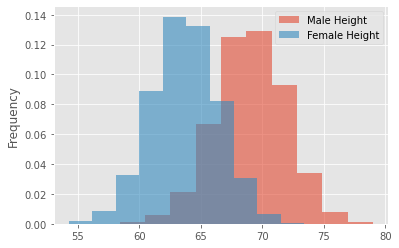

In [4]:
binsize = 10
male_df.Height.plot.hist(bins=binsize, density=True, label="Male Height", alpha=0.6)
female_df.Height.plot.hist(bins=binsize, density=True, label="Female Height", alpha=0.6)
plt.legend()
plt.show();

In [5]:
# Record your observations - are these inline with your personal observations?
# mean Male Height > mean Female Height
# std Male Height very close to std Female Height
# Shapes of the 2 histograms are very similar

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

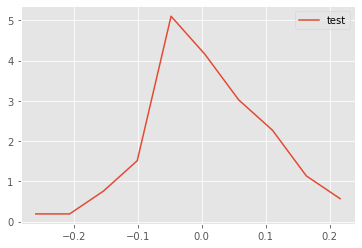

In [6]:
def density(x):
    n, bins = np.histogram(x, binsize, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = (bins[k] + bins[k+1])/2
        pdfy[k] = n[k]
        
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

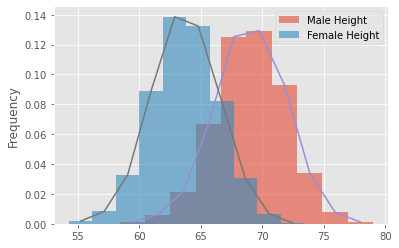

In [7]:
male_df.Height.plot.hist(bins=binsize, density=True, label="Male Height", alpha=0.6)
female_df.Height.plot.hist(bins=binsize, density=True, label="Female Height", alpha=0.6)

mx, my = density(male_df.Height)
fx, fy = density(female_df.Height)
plt.plot(mx, my)
plt.plot(fx, fy)
plt.legend()
plt.show();

## Repeat the above exercise for male and female weights

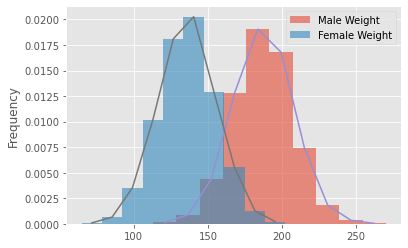

In [8]:
male_df.Weight.plot.hist(bins=binsize, density=True, label="Male Weight", alpha=0.6)
female_df.Weight.plot.hist(bins=binsize, density=True, label="Female Weight", alpha=0.6)

mx, my = density(male_df.Weight)
fx, fy = density(female_df.Weight)
plt.plot(mx, my)
plt.plot(fx, fy)
plt.legend()
plt.show();

## Write your observations in the cell below

In [9]:
# Record your observations - are these inline with your personal observations?
# mean Male Weight > mean Female Weight
# std Male Weight very close to std Female Weight
# Shapes of the 2 histograms are very similar

# What is the takeaway when comparing male and female heights and weights?
# Males mean height & weight > Females mean height & weight
# Std are very close
# Shapes of histogram are very similar (similar frequencies & stds)

## Repeat the above experiments in seaborn and compare with your results

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


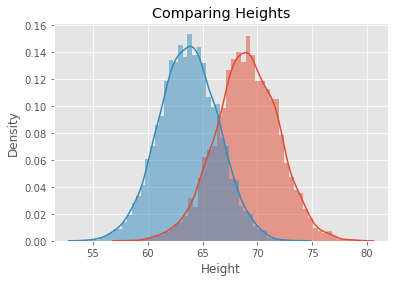

In [10]:
fig, ax = plt.subplots()
sns.distplot(male_df.Height,
             hist=True, hist_kws={"alpha": 0.5,
                                  "label": "Male Height"},
             kde=True, kde_kws={"alpha": 0.5}
            )

sns.distplot(female_df.Height,
             hist=True, hist_kws={"alpha": 0.5,
                                  "label": "Female Height"},
             kde=True, kde_kws={"alpha": 0.5})

ax.set_title("Comparing Heights")
plt.show();

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


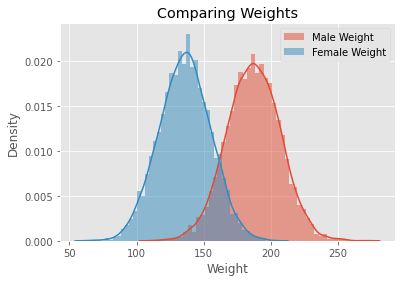

In [11]:
fig, ax = plt.subplots()
sns.distplot(male_df.Weight,
             hist=True, hist_kws={"alpha": 0.5,
                                  "label": "Male Weight"},
             kde=True, kde_kws={"alpha": 0.5}
            )

sns.distplot(female_df.Weight,
             hist=True, hist_kws={"alpha": 0.5,
                                  "label": "Female Weight"},
             kde=True, kde_kws={"alpha": 0.5})

ax.set_title("Comparing Weights")
plt.legend()
plt.show();

In [12]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# It looks like the shape of the kdes of both approaches are very similar, with seaborn kde looks smoother
# probably because of binsize. If we increase number of bins in first method interpolation, it will resemble 
# seaborn plots more.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.